In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
numeric_columns = data.select_dtypes(include = [np.number]).columns
non_numeric_columns = data.select_dtypes(exclude = [np.number]).columns

In [9]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [10]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
  data[column]=label_encoder.fit_transform(data[column].astype(str))

In [12]:
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
X= data[features]

In [13]:
#Scaler numeric feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
#optimal number of cluster using Elbow method
sse = []
for k in range(1,11):
  kmeans= KMeans(n_clusters =k,random_state =42)
  kmeans.fit(X_scaled)
  sse.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

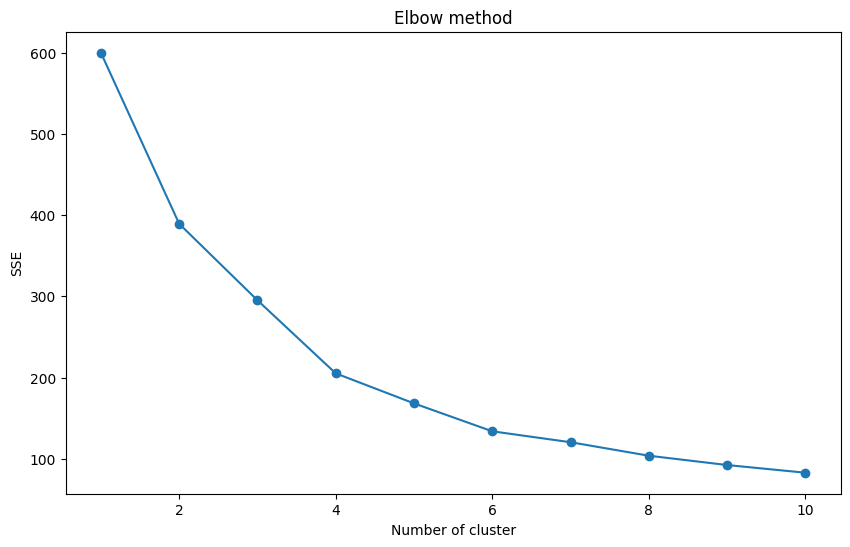

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse,marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.show()

In [31]:
optimal_k = 5
kmeans =KMeans(n_clusters= optimal_k,random_state=42)
data['cluster']= kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



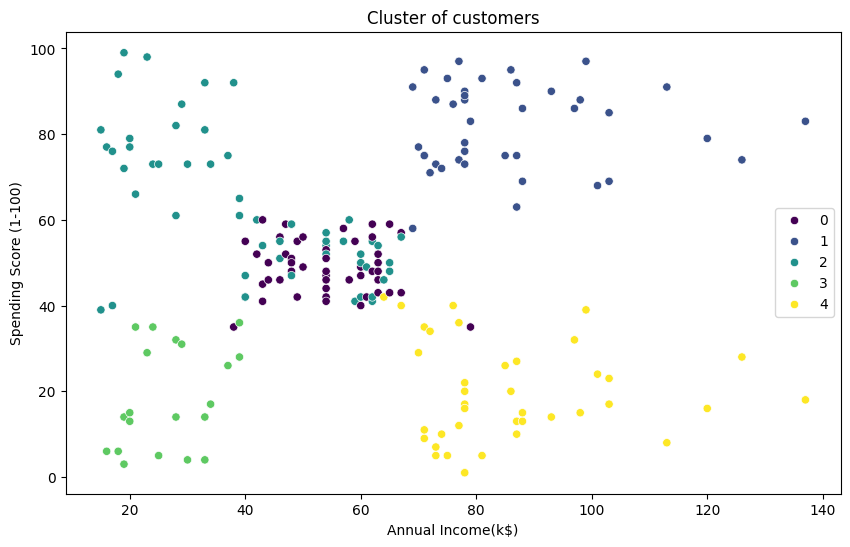

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)', hue='cluster',palette='viridis')
plt.title('Cluster of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [36]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df=pd.DataFrame(cluster_centers,columns= features)
cluster_centers_df['cluster']= range(optimal_k)

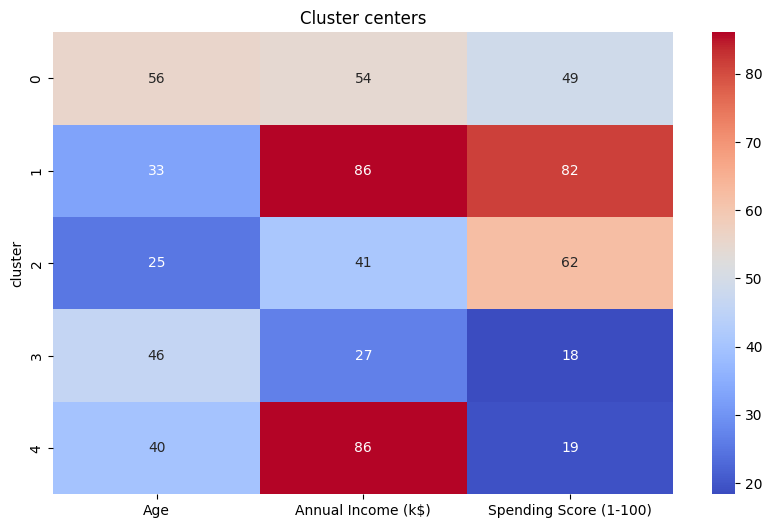

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_centers_df.set_index('cluster'),annot=True,cmap='coolwarm')
plt.title('Cluster centers')
plt.show()

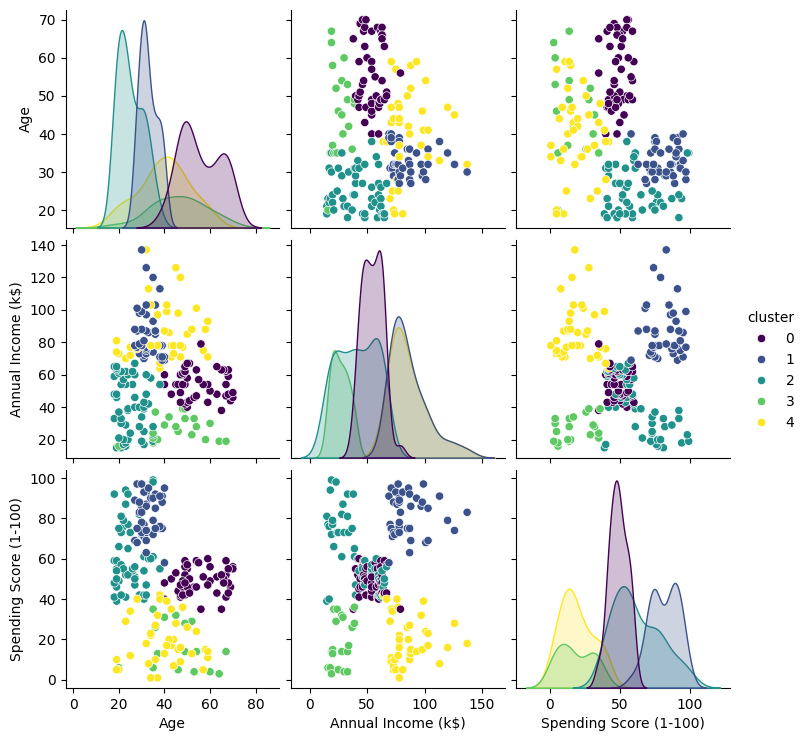

In [38]:
sns.pairplot(data,hue='cluster',palette='viridis',vars= features)
plt.show()